## 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

## 모델 구성하기 - Conv1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

## 모델 학습시키기

In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 구성하기 - Conv1D + LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.sin(2 * np.pi * 0.05 + np.arange(0, 500)) + np.random.random(500)
plt.figure(figsize = (10, 5)) 
plt.plot(np.arange(0, 367), data[:367], 'bo-', color = 'black', alpha = 0.7) # 학습용 데이터
plt.plot(np.arange(367, 500), data[367:], 'ro-', color = 'orange') # 테스트용 데이터

def data_gen(data, n):
    x_train = []
    y_train = []
    
    for i in range(len(data)):
        x = data[i:(i + n)]
        if (i + n) < len(data):
            x_train.append(x)
            y_train.append(data[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10

x_train, y_train = data_gen(data, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25)

Train on 367 samples
Epoch 1/100
367/367 [==============================] - 5s 13ms/sample - loss: 0.5337 - mse: 0.5337
Epoch 2/100
367/367 [==============================] - 0s 840us/sample - loss: 0.2161 - mse: 0.2161
Epoch 3/100
367/367 [==============================] - 0s 788us/sample - loss: 0.1372 - mse: 0.1372
Epoch 4/100
367/367 [==============================] - 0s 717us/sample - loss: 0.1231 - mse: 0.1231
Epoch 5/100
367/367 [==============================] - 0s 764us/sample - loss: 0.1265 - mse: 0.1265
Epoch 6/100
367/367 [==============================] - 0s 745us/sample - loss: 0.1185 - mse: 0.1185
Epoch 7/100
367/367 [==============================] - 0s 726us/sample - loss: 0.1191 - mse: 0.1191
Epoch 8/100
367/367 [==============================] - 0s 728us/sample - loss: 0.1111 - mse: 0.1111
Epoch 9/100
367/367 [==============================] - 0s 734us/sample - loss: 0.1130 - mse: 0.1130
Epoch 10/100
367/367 [==============================] - 0s 739us/sample - loss: 

367/367 [==============================] - 0s 712us/sample - loss: 0.0756 - mse: 0.0756
Epoch 83/100
367/367 [==============================] - 0s 726us/sample - loss: 0.0752 - mse: 0.0752
Epoch 84/100
367/367 [==============================] - 0s 766us/sample - loss: 0.0790 - mse: 0.0790
Epoch 85/100
367/367 [==============================] - 0s 728us/sample - loss: 0.0746 - mse: 0.0746
Epoch 86/100
367/367 [==============================] - 0s 738us/sample - loss: 0.0758 - mse: 0.0758
Epoch 87/100
367/367 [==============================] - 0s 717us/sample - loss: 0.0778 - mse: 0.0778
Epoch 88/100
367/367 [==============================] - 0s 747us/sample - loss: 0.0781 - mse: 0.0781
Epoch 89/100
367/367 [==============================] - 0s 731us/sample - loss: 0.0767 - mse: 0.0767
Epoch 90/100
367/367 [==============================] - 0s 717us/sample - loss: 0.0755 - mse: 0.0755
Epoch 91/100
367/367 [==============================] - 0s 720us/sample - loss: 0.0777 - mse: 0.0777
Epo

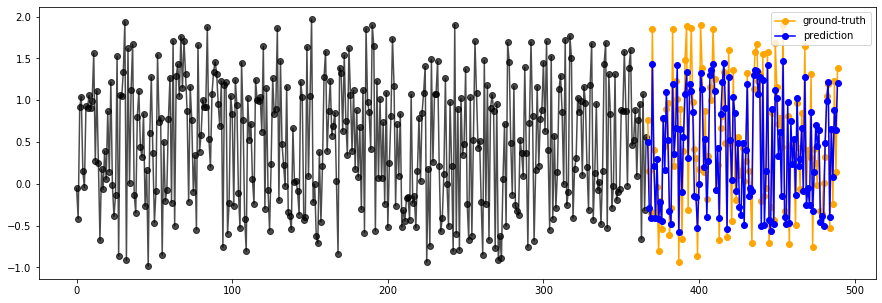

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'mse',
             metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 100, batch_size = 12)

pred = model.predict(x_test)

# 결괏값을 그립니다.
train_range = np.arange(0, len(y_train))
pred_range = np.arange(len(y_train), len(y_train) + len(pred))
train_shape= y_train.shape[0]; test_shape = y_test.shape[0]; pred_shape = pred.shape[0]

plt.figure(figsize=(15,5))
plt.plot(train_range, y_train.reshape(train_shape,), 'o-', color='black', alpha = 0.7)
plt.plot(pred_range, y_test.reshape(test_shape,), 'o-', color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(test_shape,), 'o-', color='blue', label='prediction')
plt.legend()
plt.show()